# Importation des packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score 
from sklearn.preprocessing import LabelEncoder
import nltk
from gensim.parsing.preprocessing import remove_stopwords
from ast import literal_eval

# Importation du jeu de données et première analyses  

In [76]:
df = pd.read_csv('Tweets.csv')

In [3]:
df=df.assign(airline_comp=df['airline'])
del df['airline']
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,airline_comp
0,570306133677760513,neutral,1.0000,NaN,NaN,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),Virgin America
1,570301130888122368,positive,0.3486,NaN,0.0000,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),Virgin America
2,570301083672813571,neutral,0.6837,NaN,NaN,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),Virgin America
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),Virgin America
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),Virgin America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN,American
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,American
14637,569587242672398336,neutral,1.0000,NaN,NaN,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,American
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),American


Cette base de données indique si le sentiment des tweets était positif, neutre ou négatif pour six compagnies aériennes américaines. Ce jeu de données est composé de 14 635 lignes et de 15 variables : 
- tweet_id 
- airline_sentiment
- airline_sentiment_confidence
- negativereason
- negativereason_confidence
- airline
- airline_sentiment_gold 
- name
- negativereason_gold
- retweet_count
- text 
- tweet_coord
- tweet_created
- tweet_location 
- user_timezone

In [38]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,airline_comp,final_text,clean_text
0,570306133677760513,neutral,1.0000,NaN,NaN,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),Virgin America,what said,['said']
1,570301130888122368,positive,0.3486,NaN,0.0000,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),Virgin America,plus you have added commercials to the experie...,"['plus', 'added', 'commercials', 'experience',..."
2,570301083672813571,neutral,0.6837,NaN,NaN,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),Virgin America,i did not today must mean i need to take anoth...,"['today', 'must', 'mean', 'need', 'take', 'ano..."
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),Virgin America,bad flight it is really aggressive to blast ob...,"['bad', 'flight', 'really', 'aggressive', 'bla..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),Virgin America,ca not tell and it is a really big bad thing a...,"['ca', 'tell', 'really', 'big', 'bad', 'thing']"


In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

# Analyse descriptives

#### Analyse univariée 

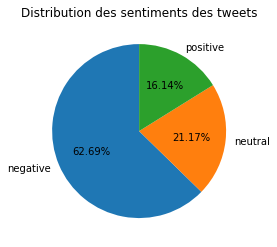

In [39]:
sentiment = df['airline_sentiment'].value_counts()
plt.pie(sentiment, labels=sentiment.index, startangle=90, autopct = lambda x: str(round(x, 2)) + '%') 
plt.title('Distribution des sentiments des tweets')
plt.show()

Nous voyons que plus de la moitié (environ 63%) des tweets sont des tweets négatifs. 

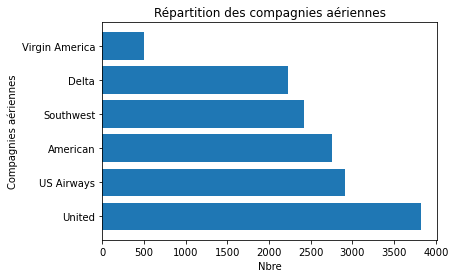

In [42]:
airline = df['airline'].value_counts()
plt.barh(airline.index, airline) 
plt.title('Répartition des compagnies aériennes')
plt.xlabel('Nbre')
plt.ylabel('Compagnies aériennes')
plt.show()

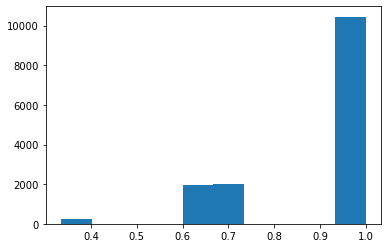

In [43]:
plt.hist(df['airline_sentiment_confidence'])
plt.xlabel('')
plt.title('')
plt.show()

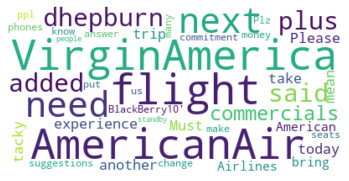

In [44]:
text = df['text'].values
wc = WordCloud(max_font_size=60, background_color="white").generate(str(text))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Analyse bivariée 

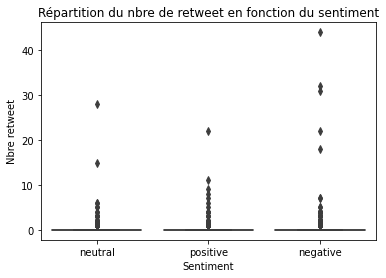

In [52]:
sns.boxplot(x='airline_sentiment', y='retweet_count', data=df)
plt.title('Répartition du nbre de retweet en fonction du sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Nbre retweet')
plt.show()

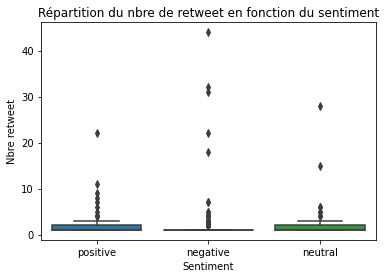

In [51]:
df_mask=df['retweet_count']!=0 
filtered_df = df[df_mask]
sns.boxplot(x='airline_sentiment', y='retweet_count', data=filtered_df)
plt.title('Répartition du nbre de retweet en fonction du sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Nbre retweet')
plt.show()

<AxesSubplot:xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

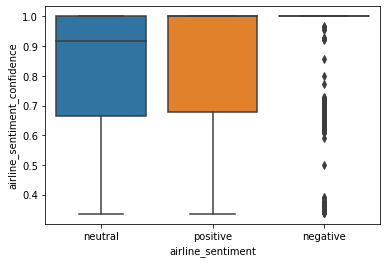

In [53]:
sns.boxplot(x='airline_sentiment', y='airline_sentiment_confidence', data=df)

In [54]:
table = pd.pivot_table(df,
                       index=['airline_sentiment', 'airline'],
                       values=['airline_sentiment_confidence','negativereason_confidence', 'retweet_count'])
table

airline_sentiment_confidence  \
airline_sentiment airline                                        
negative          American                            0.944955   
                  Delta                               0.902202   
                  Southwest                           0.920533   
                  US Airways                          0.945714   
                  United                              0.933383   
                  Virgin America                      0.901733   
neutral           American                            0.825938   
                  Delta                               0.829264   
                  Southwest                           0.826109   
                  US Airways                          0.821922   
                  United                              0.809756   
                  Virgin America                      0.838368   
positive          American                            0.882302   
                  Delta                               0.867111   
                  Southwest                           0.886105   
                  US Airways                          0.859686   
                  United                              0.856012   
                  Virgin America                      0.887978   

                                  negativereason_confidence  retweet_count  
airline_sentiment airline                                                   
negative          American                         0.744644       0.047449  
                  Delta                            0.710520       0.115183  
                  Southwest                        0.732866       0.048061  
                  US Airways                       0.750028       0.091471  
                  United                           0.714719       0.147360  
                  Virgin America                   0.717003       0.011050  
neutral           American                         0.000000       0.019438  
                  Delta                            0.000000       0.105118  
                  Southwest                        0.000000       0.046687  
                  US Airways                       0.000000       0.083990  
                  United                           0.000000       0.037303  
                  Virgin America                   0.000000       0.087719  
positive          American                         0.000000       0.044643  
                  Delta                            0.000000       0.121324  
                  Southwest                        0.000000       0.100000  
                  US Airways                       0.000000       0.037175  
                  United                           0.000000       0.014228  
                  Virgin America                   0.000000       0.059211

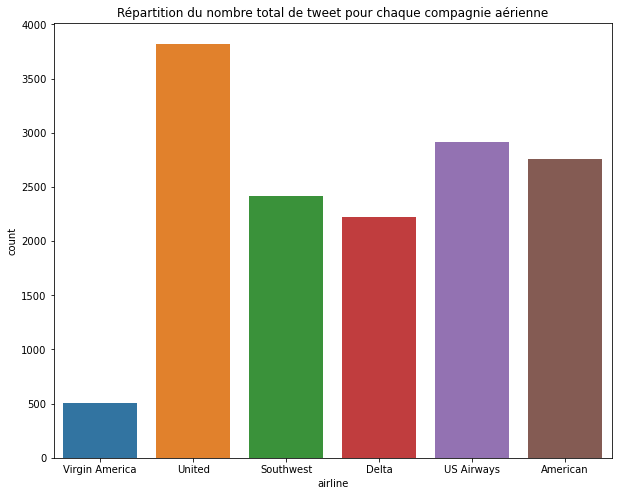

In [55]:
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline', data = df)
ax.set_title(label = 'Répartition du nombre total de tweet pour chaque compagnie aérienne')
plt.show()

In [59]:
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airlines :
    print('{} : \n'.format(i),df.loc[df.airline == i].airline_sentiment.value_counts())

US Airways : 
 negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64
United : 
 negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64
American : 
 negative    1960
neutral      463
positive     336
Name: airline_sentiment, dtype: int64
Southwest : 
 negative    1186
neutral      664
positive     570
Name: airline_sentiment, dtype: int64
Delta : 
 negative    955
neutral     723
positive    544
Name: airline_sentiment, dtype: int64
Virgin America : 
 negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64


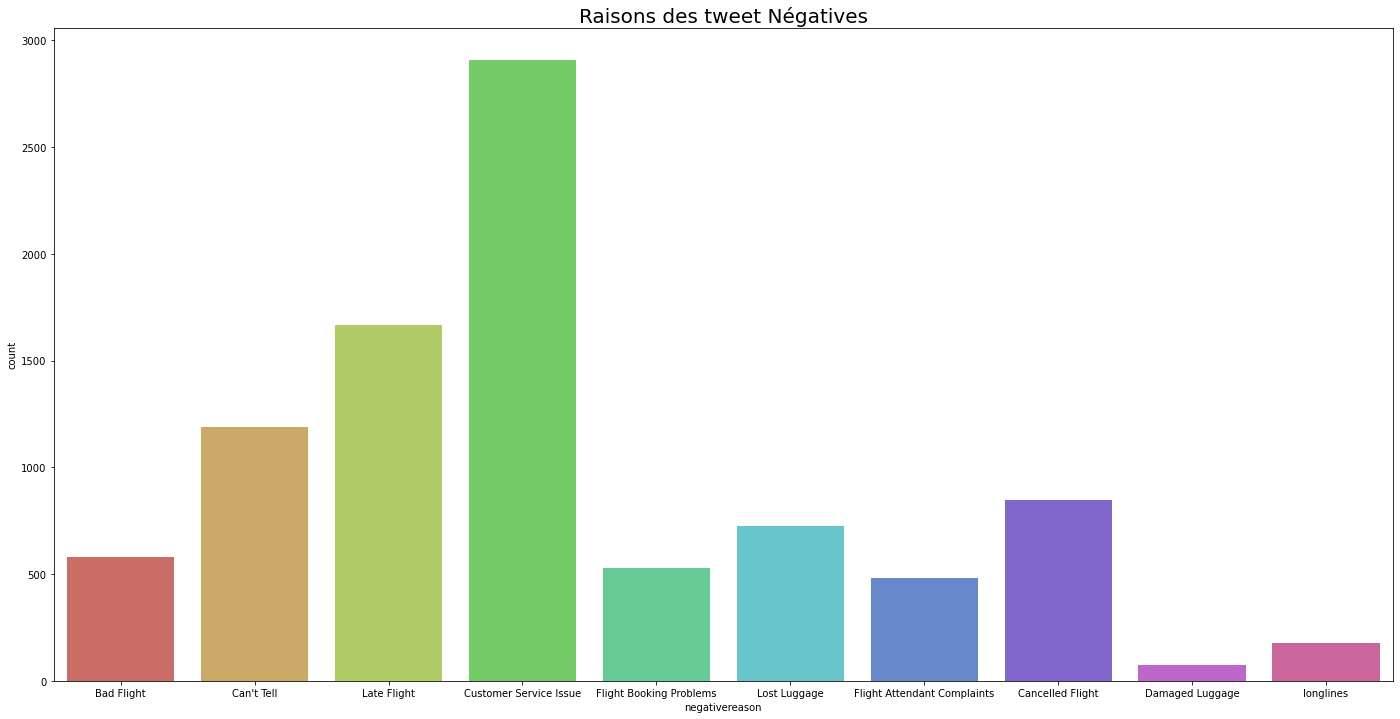

In [60]:
plt.figure(figsize = (24, 12))
sns.countplot(x = 'negativereason', data = df, palette = 'hls')
plt.title('Raisons des tweet Négatives', fontsize = 20)
plt.show()

In [61]:
positive=df[df['airline_sentiment']=='positive'].text
neutral=df[df['airline_sentiment']=='neutral'].text
negative=df[df['airline_sentiment']=='negative'].text

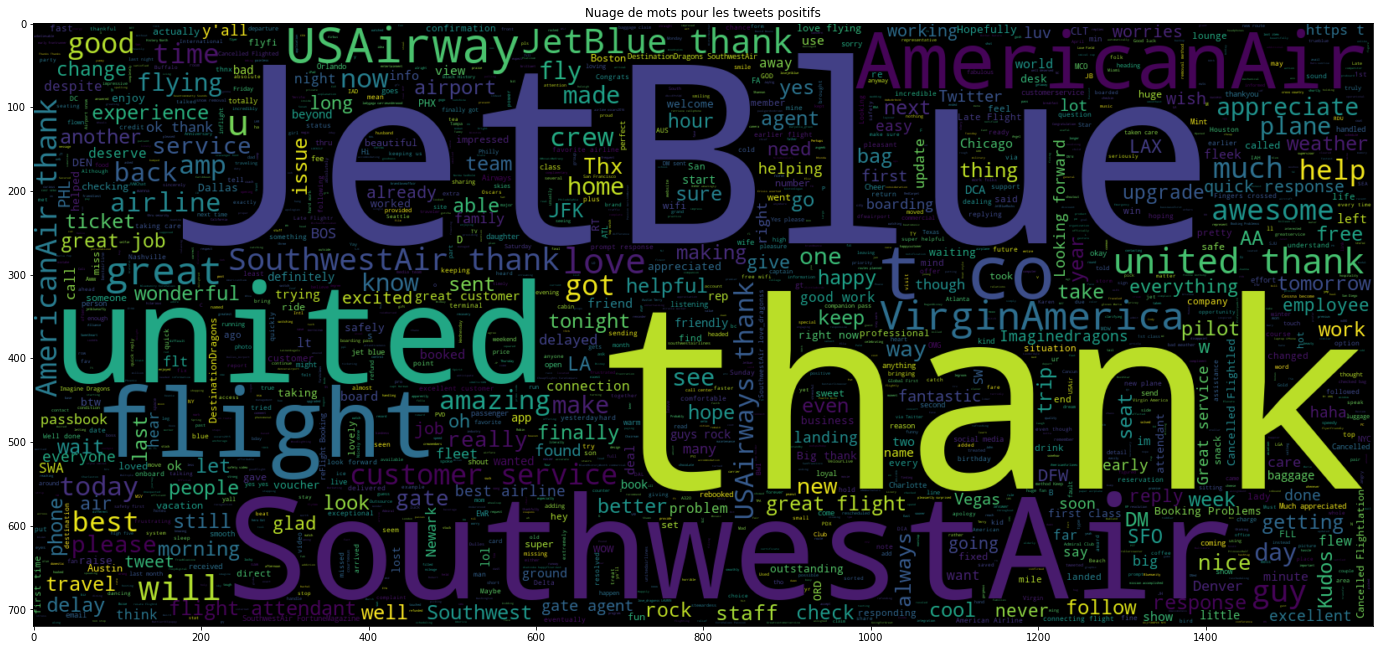

In [65]:
plt.figure(figsize=(24,20))
world_cloud_postive=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate("".join(positive))
plt.imshow(world_cloud_postive,interpolation='bilinear')
plt.title('Nuage de mots pour les tweets positifs')
ax.grid(False)

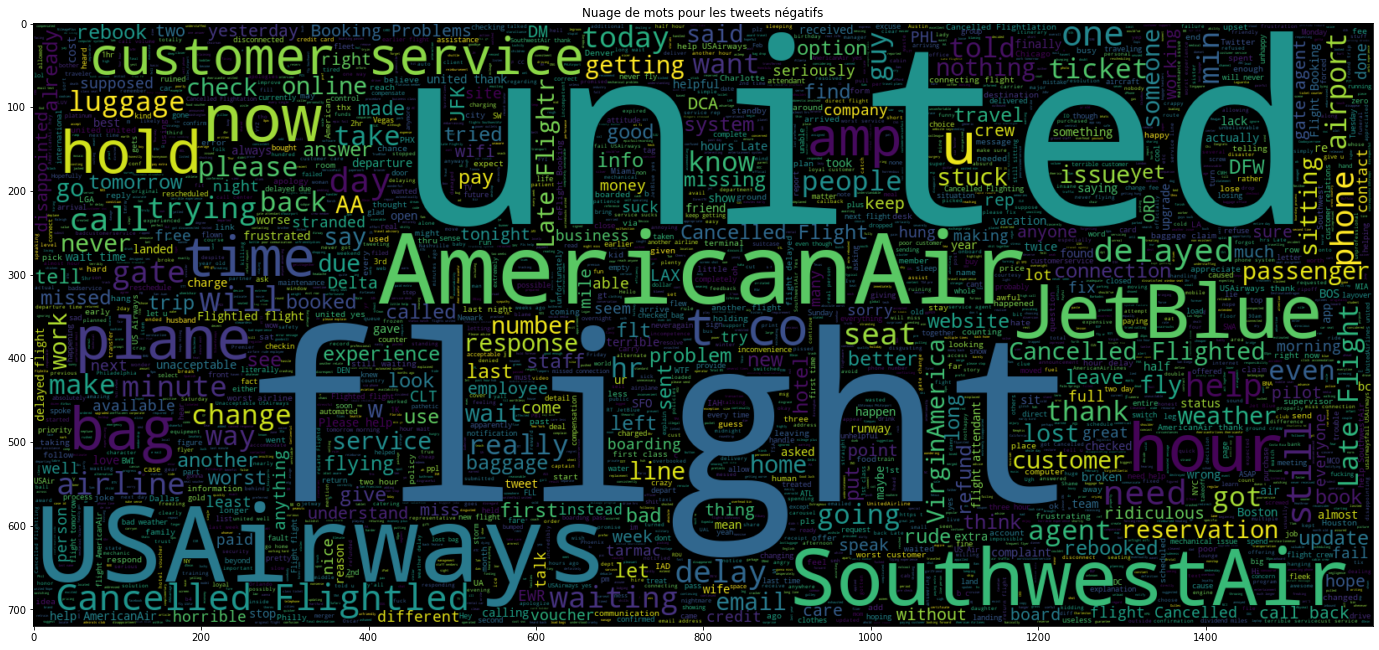

In [66]:
plt.figure(figsize = (24,12)) 
worldcould_negative = WordCloud(min_font_size = 3,  max_words = 3200 , width = 1600 , height = 720).generate(" ".join(negative))
plt.imshow(worldcould_negative,interpolation = 'bilinear')
plt.title('Nuage de mots pour les tweets négatifs')
ax.grid(False)

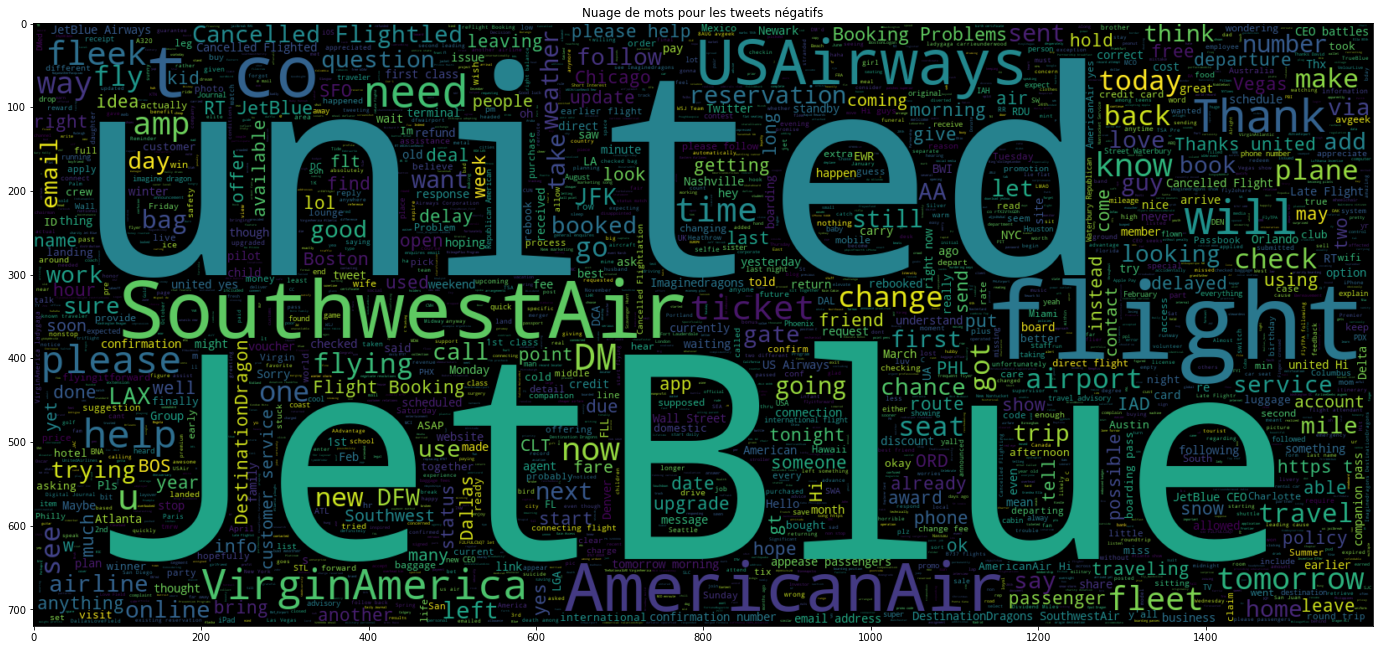

In [75]:
plt.figure(figsize = (24,12)) 
worldcould_neutre = WordCloud(min_font_size = 3,  max_words = 3200 , width = 1600 , height = 720).generate(" ".join(neutral))
plt.imshow(worldcould_neutre,interpolation = 'bilinear')
plt.title('Nuage de mots pour les tweets négatifs')
ax.grid(False)